In [13]:
import numpy as np
import bilby
from scipy.io import loadmat
from pygwb.pe import *
from pygwb.baseline import Baseline
import bilby.gw.detector as bilbydet

import sys
import corner

from matplotlib import pyplot as plt
import numpy as np
from pygwb.constants import h0
import pygwb.constants
import bilby
import bilby.gw.detector as bilbydet
from scipy.io import loadmat
from pygwb.baseline import Baseline
import scipy.special as ss

import pandas as pd
import matplotlib.ticker as ticker

import sys
import corner

import csv 

import scipy.special as ss
import pandas as pd
from scipy import interpolate

In [14]:
def prefactor(f, frd, fsd, fmd, Hinf, alpha_stiff):
        farray = [] 
        Gkarray = [] 
  
        with open('/home/hannah.duval/kination_for_Git/freq_Gk.csv','r') as csvfile: 
            lines = csv.reader(csvfile, delimiter='	') 
            for row in lines: 
                farray.append(float(row[0])) 
                Gkarray.append(float(row[1]))
        Gk_func_interpolated = interpolate.interp1d(farray, Gkarray)       
        
        mplanck = 2.44 * 10**(18)
        Omegarad =  9.15 * 10**(-5)
        return (1/(768 * fmd**4 * mplanck**2)* f**2 * (f/frd)**(4 - 2 * alpha_stiff) *(f/fsd)**(2 *(-1 + alpha_stiff)) * Gk_func_interpolated(np.minimum(f,frd)) * Hinf**2 * Omegarad * np.pi**4 * alpha_stiff**2)

In [15]:
def finalplotexprfunction(f, frd, fsd, fmd, Hinf, alpha_stiff):
    
    jplusfrd = ss.jv(alpha_stiff + 1/2., alpha_stiff * f/frd)
    jminfrd = ss.jv(alpha_stiff - 1/2., alpha_stiff * f/frd)

    jplusfsd = ss.jv(alpha_stiff + 1/2., alpha_stiff * f/fsd)
    jminfsd = ss.jv(alpha_stiff - 1/2., alpha_stiff * f/fsd)

    yplusfrd = ss.yv(alpha_stiff + 1/2., alpha_stiff * f/frd)
    yminfrd = ss.yv(alpha_stiff - 1/2., alpha_stiff * f/frd)

    yplusfsd = ss.yv(alpha_stiff + 1/2., alpha_stiff * f/fsd)
    yminfsd = ss.yv(alpha_stiff - 1/2., alpha_stiff * f/fsd)

    jminminfrd= ss.jv(-alpha_stiff - 1/2., alpha_stiff * f/frd) 

    minjfrd= ss.jv(1/2. - alpha_stiff, alpha_stiff * f/frd)
    
    return (prefactor(f, frd, fsd, fmd, Hinf, alpha_stiff) *
    ((((-((np.sqrt(2/np.pi) * jplusfrd * np.cos(f/frd))/np.sqrt((f/frd))) - 
    (np.sqrt(2/np.pi) * jminfrd * (-((frd * np.cos(f/frd))/f) - np.sin(f/frd)))/np.sqrt(f/frd)) *
    (-((2 *np.sqrt(2)* fmd * np.cos(f/fmd) *(-np.cos((2 * f)/fmd) + 
    (fmd * np.sin((2 * f)/fmd))/(2 * f)) * ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 *f)) 
    - np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) 
    + (yminfsd * (-np.cos((2 * f)/fsd) + (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))))/np.pi) + 
    (1/np.pi)* 2 * np.sqrt(2) * fmd * (-np.cos(f/fmd) + (fmd * np.sin(f/fmd))/f) *
    (-((fmd * np.cos((2 * f)/fmd))/(2 *f)) - np.sin((2 *f)/fmd)) * 
    (-((yplusfsd * (-np.cos((2 * f)/fsd) + (fsd * np.sin((2 *f)/fsd))/(2 *f)))/(np.sqrt(f/fsd) *np.sqrt(np.pi))) + 
    (yminfsd * (-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 *f)/fsd) + 
    (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) - 
    (1/(np.sqrt((f/fmd)))) * np.sqrt(2/np.pi) * np.sin(f/fmd) * (-((2 * f * np.sin((2 * f)/fmd) * 
    ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (yminfsd * (-np.cos((2 * f)/fsd) + (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))))/(np.sqrt(f/fmd) * np.sqrt(np.pi))) + 
    (fmd * (-np.cos((2 * f)/fmd) + (fmd * np.sin((2 * f)/fmd))/(2 * f)) * ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (yminfsd * (-np.cos((2 * f)/fsd) + (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 *f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 *f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))))/(np.sqrt(f/fmd) * np.sqrt(np.pi)) + 
    (2 * f * (np.cos((2 * f)/fmd) - (3 * fmd**2 * np.cos((2 * f)/fmd))/(4 * f**2) - 
    (3 * fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-((yplusfsd * (-np.cos((2 * f)/fsd) + 
    (fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) + 
    (yminfsd * (-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd) + 
    (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))))/(np.sqrt(f/fmd) * np.sqrt(np.pi)))) + 
    (-((np.sqrt(2/np.pi)* yplusfrd * np.cos(f/frd))/np.sqrt((f/frd))) 
    - (np.sqrt(2/np.pi)* yminfrd * (-((frd * np.cos(f/frd))/f) - 
    np.sin(f/frd)))/np.sqrt(f/frd)) * (jplusfsd * ((2 * np.sqrt(2) * fmd * np.cos(f/fmd) * (-np.cos((2 * f)/fmd) + 
    (fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.pi**(3/2)) + (2 * np.sqrt(2) * fmd * (-np.cos(f/fmd) + 
    (fmd * np.sin(f/fmd))/f) * (-((fmd * np.cos((2 * f)/fmd))/(2 * f)) - 
    np.sin((2 * f)/fmd)) * (-np.cos((2 * f)/fsd) + (fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.pi**(3/2)) + 
    (1/np.sqrt((f/fmd))) *np.sqrt(2/np.pi) * np.sin(f/fmd) * 
    (-((2 * f * np.sin((2 * f)/fmd) * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fmd) * np.sqrt(f/fsd) * np.pi)) + 
    (fmd * (-np.cos((2 * f)/fmd) + (fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fmd) * np.sqrt(f/fsd) * np.pi) - 
    (2 * f * (np.cos((2 * f)/fmd) - (3 * fmd**2 * np.cos((2 * f)/fmd))/(4 * f**2) - 
    (3 * fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-np.cos((2 * f)/fsd) + 
    (fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fmd) * np.sqrt(f/fsd) * np.pi))) - 
    jminfsd * ((2 * np.sqrt(2) * fmd *np.cos(f/fmd) *(-np.cos((2 * f)/fmd) + 
    (fmd * np.sin((2 * f)/fmd))/(2 * f)) * (np.cos((2 * f)/fsd) - 
    (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.pi**(3/2)) + 
    (2 * np.sqrt(2) * fmd * (-np.cos(f/fmd) + (fmd * np.sin(f/fmd))/f) * 
    (-((fmd * np.cos((2 * f)/fmd))/(2 * f)) - np.sin((2 * f)/fmd)) * (-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd) + (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)))/(np.sqrt(f/fsd) * np.pi**(3/2)) + (1/np.sqrt((f/fmd)))* 
    np.sqrt(2/np.pi) * np.sin(f/fmd) * (((-((2 * f * np.sin((2 * f)/fmd))/(np.sqrt(f/fmd) * np.sqrt(np.pi))) + 
    (fmd * (-np.cos((2 * f)/fmd) + (fmd * np.sin((2 * f)/fmd))/(2 * f)))/(np.sqrt(f/fmd) * np.sqrt(np.pi))) * (np.cos((2 * f)/fsd) - 
    (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    (2 * f * (np.cos((2 * f)/fmd) - (3 * fmd**2 * np.cos((2 * f)/fmd))/(4 * f**2) - (3 * fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd) + (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)))/(np.sqrt(f/fmd) * np.sqrt(f/fsd) * np.pi)))))**2 + ((np.cos(np.pi*  alpha_stiff))**(-1) * 
    ((np.sqrt(2/np.pi) * jminminfrd * np.sin(f/frd))/np.sqrt(f/frd) + (np.sqrt(2/np.pi) * 
    minjfrd * (-np.cos(f/frd) + (frd * np.sin(f/frd))/f))/np.sqrt(f/frd)) * 
    (jplusfsd * ((2 * np.sqrt(2)* fmd * np.cos(f/fmd) * (-np.cos((2 * f)/fmd) + 
    (fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.pi**(3/2)) + 
    (2 * np.sqrt(2)* fmd * (-np.cos(f/fmd) + (fmd * np.sin(f/fmd))/f) * (-((fmd * np.cos((2 * f)/fmd))/(2 * f)) - 
    np.sin((2 * f)/fmd)) * (-np.cos((2 * f)/fsd) + (fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.pi**(3/2)) + 
    (1/np.sqrt((f/fmd))) * np.sqrt(2/np.pi) * np.sin(f/fmd) * (-((2 * f * np.sin((2 * f)/fmd) * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fmd) * np.sqrt(f/fsd) * np.pi)) + 
    (fmd * (-np.cos((2 * f)/fmd) + (fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fmd) * np.sqrt(f/fsd) * np.pi) - 
    (2 * f * (np.cos((2 * f)/fmd) - (3 * fmd**2 * np.cos((2 * f)/fmd))/(4 * f**2) - (3 * fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-np.cos((2 * f)/fsd) + 
    (fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fmd) * np.sqrt(f/fsd) * np.pi))) - 
    jminfsd * ((2 * np.sqrt(2) * fmd * np.cos(f/fmd) * (-np.cos((2 * f)/fmd) + 
    (fmd * np.sin((2 * f)/fmd))/(2 * f)) * (np.cos((2 * f)/fsd) - (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.pi**(3/2)) + 
    (2 * np.sqrt(2) * fmd * (-np.cos(f/fmd) + (fmd * np.sin(f/fmd))/f) * (-((fmd * np.cos((2 * f)/fmd))/(2 * f)) - 
    np.sin((2 * f)/fmd)) * (-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd) + (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)))/(np.sqrt(f/fsd) * np.pi**(3/2)) + 
    (1/np.sqrt((f/fmd))) * np.sqrt(2/np.pi) * np.sin(f/fmd) * (((-((2 * f * np.sin((2 * f)/fmd))/(np.sqrt(f/fmd) * np.sqrt(np.pi))) + 
    (fmd * (-np.cos((2 * f)/fmd) + (fmd * np.sin((2 * f)/fmd))/(2*  f)))/(np.sqrt(f/fmd) * np.sqrt(np.pi))) * (np.cos((2 * f)/fsd) - 
    (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    (2 * f * (np.cos((2 * f)/fmd) - (3 * fmd**2 * np.cos((2 * f)/fmd))/(4 * f**2) - 
    (3 * fmd * np.sin((2 * f)/fmd))/(2 * f)) * (-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd) + (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)))/(np.sqrt(f/fmd) * np.sqrt(f/fsd) * np.pi)))) - 
    (1/np.sqrt((f/frd))) * np.sqrt(2/np.pi) * jplusfrd * np.sin(f/frd) * (-(1/np.pi)
    * 2 * np.sqrt(2) * fmd * np.cos(f/fmd) * (-np.cos((2 * f)/fmd) + (fmd * np.sin((2 * f)/fmd))/(2 * f)) * 
    ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (yminfsd * (-np.cos((2 * f)/fsd) + (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (jplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    (jminfsd * (np.cos((2 * f)/fsd) - (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) + 
    (1/np.pi) * 2 * np.sqrt(2) * fmd * (-np.cos(f/fmd) + (fmd * np.sin(f/fmd))/f) * 
    (-((fmd * np.cos((2 * f)/fmd))/(2 * f)) - np.sin((2 * f)/fmd)) * 
    (((-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd) + (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)) * 
    (yminfsd + jminfsd * np.tan(np.pi * alpha_stiff)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    ((-np.cos((2 * f)/fsd) + (fsd * np.sin((2 * f)/fsd))/(2 * f)) * 
    (yplusfsd + jplusfsd * np.tan(np.pi * alpha_stiff)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) - 
    (1/np.sqrt((f/fmd))) *  np.sqrt(2/np.pi) * np.sin(f/fmd) * (-(1/(np.sqrt(f/fmd) * np.sqrt(np.pi))) * 
    2 * f * np.sin((2 * f)/fmd) * ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (yminfsd * (-np.cos((2 * f)/fsd) + (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (jplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd)) * 
    np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    (jminfsd * (np.cos((2 * f)/fsd) - (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) + 
    (1/(np.sqrt(f/fmd) * np.sqrt(np.pi))) * fmd * (-np.cos((2 * f)/fmd) + 
    (fmd * np.sin((2 * f)/fmd))/(2 * f)) * ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + (yminfsd * (-np.cos((2 * f)/fsd) + 
    (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (jplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    (jminfsd * (np.cos((2 * f)/fsd) - (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) + 
    (1/(np.sqrt(f/fmd) * np.sqrt(np.pi))) * 2 * f * (np.cos((2 * f)/fmd) - 
    (3 * fmd**2 * np.cos((2 * f)/fmd))/(4 * f**2) - (3 * fmd * np.sin((2 * f )/fmd))/(2 * f)) * 
    (((-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd) + 
    (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)) * (yminfsd + jminfsd * np.tan(np.pi * alpha_stiff)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    ((-np.cos((2 * f)/fsd) + (fsd * np.sin((2 * f)/fsd))/(2 * f)) * (yplusfsd + 
    jplusfsd * np.tan(np.pi * alpha_stiff)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))))) + (1/np.sqrt((f/frd))) * np.sqrt(2/np.pi) * 
    jminfrd * (-np.cos(f/frd) + (frd * np.sin(f/frd))/f) * (-(1/np.pi) * 2 * np.sqrt(2) * 
    fmd * np.cos(f/fmd) * (-np.cos((2 * f)/fmd) + (fmd * np.sin((2 * f)/fmd))/(2 * f))* 
    ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (yminfsd * (-np.cos((2 * f)/fsd) + (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (jplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    (jminfsd * (np.cos((2 * f)/fsd) - (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) + 
    (1/np.pi) * 2 * np.sqrt(2) * fmd * (-np.cos(f/fmd) + (fmd * np.sin(f/fmd))/f) * (-((fmd * np.cos((2 * f)/fmd))/(2 * f)) - 
    np.sin((2 * f)/fmd)) * (((-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd) + (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)) * (yminfsd + 
    jminfsd * np.tan(np.pi * alpha_stiff)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    ((-np.cos((2 * f)/fsd) + (fsd * np.sin((2 * f)/fsd))/(2 * f)) * (yplusfsd + 
    jplusfsd * np.tan(np.pi * alpha_stiff)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) - 
    (1/np.sqrt((f/fmd))) * np.sqrt(2/np.pi) * np.sin(f/fmd) * (-(1/(np.sqrt(f/fmd) * np.sqrt(np.pi)))* 
    2 * f * np.sin((2 * f)/fmd) * ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + (
    yminfsd * (-np.cos((2 * f)/fsd) + (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (jplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    (jminfsd * (np.cos((2 * f)/fsd) - (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) + 
    (1/(np.sqrt(f/fmd) * np.sqrt(np.pi)))* fmd * (-np.cos((2 * f)/fmd) + (fmd * np.sin((2 * f)/fmd))/(2 * f)) * 
    ((yplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (yminfsd * (-np.cos((2 * f)/fsd) + (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) + 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) + 
    (jplusfsd * (-((fsd * np.cos((2 * f)/fsd))/(2 * f)) - 
    np.sin((2 * f)/fsd)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    (jminfsd * (np.cos((2 * f)/fsd) - (3 * fsd**2 * np.cos((2 * f)/fsd))/(4 * f**2) - 
    (3 * fsd * np.sin((2 * f)/fsd))/(2 * f)) * np.tan(np.pi * alpha_stiff))/(np.sqrt(f/fsd) * np.sqrt(np.pi))) + 
    (1/(np.sqrt(f/fmd) * np.sqrt(np.pi))) * 2 * f * (np.cos((2 * f)/fmd) - 
    (3 * fmd**2 * np.cos((2 * f)/fmd))/(4 * f**2) - (3 * fmd * np.sin((2 * f)/fmd))/(2 * f)) * 
    (((-((3 * fsd * np.cos((2 * f)/fsd))/(2 * f)) - np.sin((2 * f)/fsd) + 
    (3 * fsd**2 * np.sin((2 * f)/fsd))/(4 * f**2)) * (yminfsd 
    + jminfsd * np.tan(np.pi * alpha_stiff)))/(np.sqrt(f/fsd) * np.sqrt(np.pi)) - 
    ((-np.cos((2 * f)/fsd) + (fsd * np.sin((2 * f)/fsd))/(2 * f)) * 
    (yplusfsd + jplusfsd * np.tan(np.pi * alpha_stiff)))/(np.sqrt(f/fsd) * np.sqrt(np.pi))))))**2)))

In [16]:
f_RD_benchmark = 10**(-8)
f_SD_benchmark = 50

f_MD_max = 1.8*10**(8)
f_MD_max_old = 10**(8)

H_inf_max =  5.12*10**(13)
H_inf_max_old =  6.6*10**(13)
w_s_benchmark = 0.8

alpha_benchmark = 2/(1 + 3 * w_s_benchmark)

alphamax = 2/(1 + 3 * 1./3.)
alphamin = 2/(1 + 3 * 0.99)

In [17]:
freqs = np.logspace(np.log10(1),np.log10(1700),100)

Text(0, 0.5, '$\\Omega_{\\rm GW} (f)$')

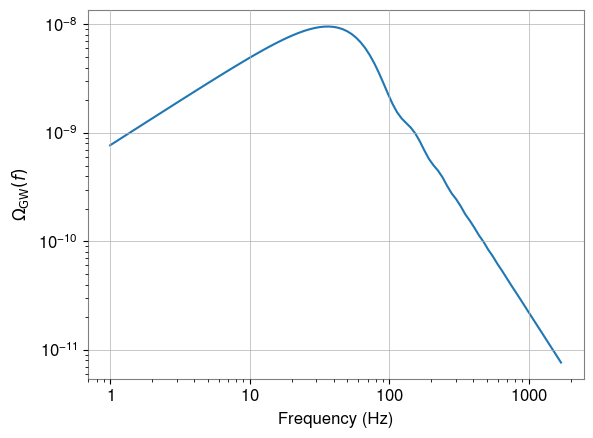

In [19]:

plt.loglog(freqs, finalplotexprfunction(freqs, f_RD_benchmark, f_SD_benchmark, f_MD_max, H_inf_max, alpha_benchmark) )


plt.xlabel( 'Frequency (Hz)' )
plt.ylabel( r'$\Omega_{\rm GW} (f)$' )


